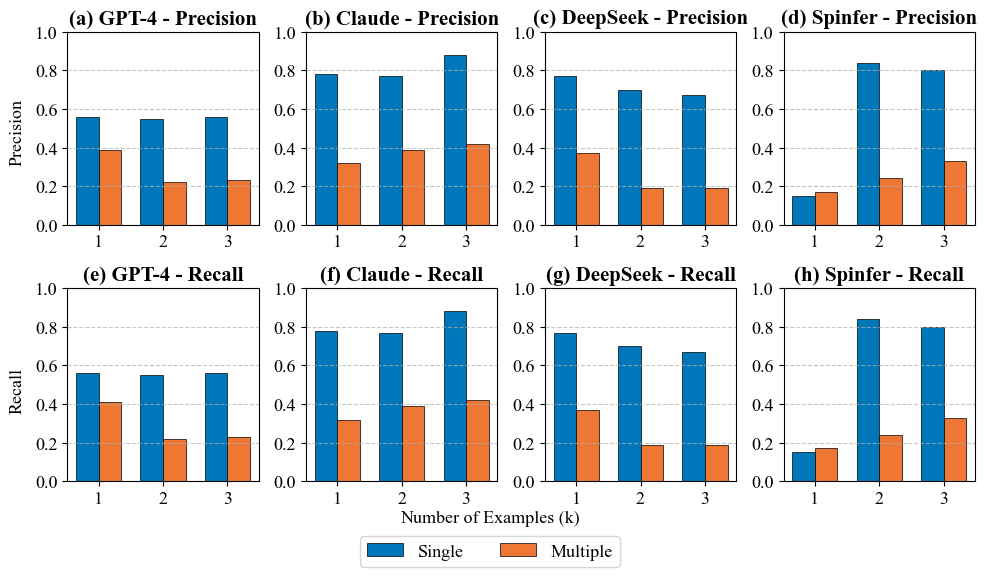

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick

fontsize = 15

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
})

# Load data from CSV file
df = pd.read_csv('results_multivariant.csv')

# Get unique models and k values
models = ['gpt', 'claude', 'deepseek', 'spinfer']
k_values = sorted(df['n'].unique())

# Create dictionaries to store precision and recall values
precision_values = {}
recall_values = {}

# Process the data
for model in models:
    precision_values[model] = {'Single': [], 'Multiple': []}
    recall_values[model] = {'Single': [], 'Multiple': []}
    
    for k in k_values:
        # For single variant
        single_data = df[(df['model'] == model) & (df['n'] == k) & (df['setting'] == 'single-variant')]
        if not single_data.empty:
            precision_values[model]['Single'].append(single_data['precision'].values[0])
            recall_values[model]['Single'].append(single_data['recall'].values[0])
        
        # For multi variant
        multi_data = df[(df['model'] == model) & (df['n'] == k) & (df['setting'] == 'multi-variant')]
        if not multi_data.empty:
            precision_values[model]['Multiple'].append(multi_data['precision'].values[0])
            recall_values[model]['Multiple'].append(multi_data['recall'].values[0])

# Map model names to display names (capitalize first letter)
model_display_names = {
    'gpt': 'GPT-4',
    'claude': 'Claude',
    'deepseek': 'DeepSeek',
    'spinfer': 'Spinfer'
}

# Set up a suitable color palette for academic journals (colorblind-friendly)
colors = ['#0077BB', '#EE7733']  # Blue for Single, Orange for Multiple

# Set up the figure and subplots (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(10, 6), constrained_layout=False)

# Width of the bars
bar_width = 0.35

# Position of bars on x-axis
x = np.arange(len(k_values))

# Create subplots for each model's precision (top row)
for i, model in enumerate(models):
    ax = axs[0, i]
    
    # Plot bars for each variant
    bars1 = ax.bar(x - bar_width/2, precision_values[model]['Single'], 
                  bar_width, label='Single', color=colors[0], edgecolor='black', linewidth=0.5)
    bars2 = ax.bar(x + bar_width/2, precision_values[model]['Multiple'], 
                  bar_width, label='Multiple', color=colors[1], edgecolor='black', linewidth=0.5)
    
    # Add subplot title and formatting
    ax.set_title(f'({chr(97+i)}) {model_display_names[model]} - Precision', fontsize=fontsize, fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(k_values)
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # Set font size for x and y axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)

# Create subplots for each model's recall (bottom row)
for i, model in enumerate(models):
    ax = axs[1, i]
    
    # Plot bars for each variant
    bars1 = ax.bar(x - bar_width/2, recall_values[model]['Single'], 
                  bar_width, label='Single', color=colors[0], edgecolor='black', linewidth=0.5)
    bars2 = ax.bar(x + bar_width/2, recall_values[model]['Multiple'], 
                  bar_width, label='Multiple', color=colors[1], edgecolor='black', linewidth=0.5)
    
    # Add subplot title and formatting
    ax.set_title(f'({chr(97+i+4)}) {model_display_names[model]} - Recall', fontsize=fontsize, fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(k_values)
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # Set font size for x and y axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)

# Add a common x-axis label at the bottom of the figure
fig.text(0.5, 0.07, 'Number of Examples (k)', ha='center', fontsize=fontsize-2)

# Add common y-axis labels
fig.text(0.02, 0.72, 'Precision', va='center', rotation='vertical', fontsize=fontsize-2)
fig.text(0.02, 0.29, 'Recall', va='center', rotation='vertical', fontsize=fontsize-2)

# Add a common legend for all subplots at the bottom of the figure
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02),
           frameon=True, fontsize=fontsize-2)

# Adjust the layout
plt.tight_layout(rect=[0.03, 0.07, 1, 0.95])

# Save the figure (optional)
plt.savefig('plot_multivariant_exp.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()